In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
x = (-5 - 5) * torch.rand(1000) + 5
t = torch.zeros(1000)
X = torch.stack([x,t],1)
with torch.no_grad():
    label = torch.sin(x)
    label = label.reshape([1000,1])

In [3]:
model = nn.Sequential(
          nn.Linear(2,100),
          nn.Tanh(),
          nn.Linear(100,100),
          nn.Tanh(),
          nn.Linear(100,1)
        )

In [4]:
def normalize(x):
    lb = torch.tensor([-5,0])
    ub = torch.tensor([5,3])
    return 2.0 * (x - lb) / (ub - lb) - 1.0
    

In [5]:
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
criterion = nn.MSELoss()

In [6]:
for epoch in range(1000):
    optimizer.zero_grad()
    prediction = model(normalize(X))
    loss = criterion(prediction,label)
    loss.backward()
    optimizer.step()
    print("Epoch ", epoch, "Loss ", loss.item())

Epoch  0 Loss  0.5138548612594604
Epoch  1 Loss  0.4940255880355835
Epoch  2 Loss  0.4820251166820526
Epoch  3 Loss  0.48192116618156433
Epoch  4 Loss  0.4841501712799072
Epoch  5 Loss  0.48766472935676575
Epoch  6 Loss  0.48886242508888245
Epoch  7 Loss  0.48674389719963074
Epoch  8 Loss  0.48430851101875305
Epoch  9 Loss  0.4818046987056732
Epoch  10 Loss  0.4796111583709717
Epoch  11 Loss  0.4790389835834503
Epoch  12 Loss  0.47956526279449463
Epoch  13 Loss  0.4801161289215088
Epoch  14 Loss  0.48076117038726807
Epoch  15 Loss  0.4811536371707916
Epoch  16 Loss  0.48067137598991394
Epoch  17 Loss  0.47970712184906006
Epoch  18 Loss  0.47878149151802063
Epoch  19 Loss  0.4778486490249634
Epoch  20 Loss  0.47709521651268005
Epoch  21 Loss  0.4768722653388977
Epoch  22 Loss  0.4769514799118042
Epoch  23 Loss  0.47700032591819763
Epoch  24 Loss  0.4770459532737732
Epoch  25 Loss  0.47694361209869385
Epoch  26 Loss  0.47649991512298584
Epoch  27 Loss  0.475922554731369
Epoch  28 Loss  0

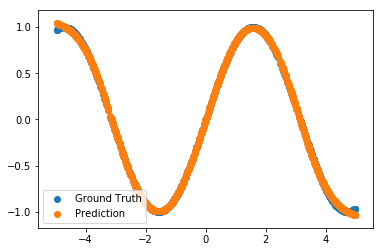

In [9]:
plt.scatter(x,label,label='Ground Truth')
plt.scatter(x,prediction.detach().numpy(),label='Prediction')
plt.legend()
plt.show()